<a href="https://colab.research.google.com/github/yvishyst/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd
import numpy as np

#Loading persons data from github

persons_df = pd.read_csv("https://github.com/yvishyst/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv")

#Renaming first column to unique id
persons_df.rename(columns={'Unnamed: 0':'unique_id'},inplace=True)

In [2]:
persons_df.head()

,unique_id,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [3]:
persons_df.describe()

,unique_id,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
#Based on the above describe data,i will bin the columns
age_bins = pd.cut(persons_df['age'],6)  # From 20 to 80 , a decade each approx
weight_bins = pd.cut(persons_df['weight'],15) # from 100 to 250, 10 pounds approx
excercise_bins = pd.cut(persons_df['exercise_time'],10) #30 mins each

In [38]:
pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


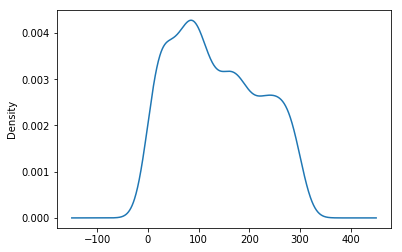

In [19]:
persons_df['exercise_time'].plot.density()

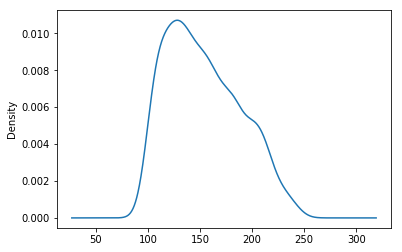

In [18]:
persons_df['weight'].plot.density()

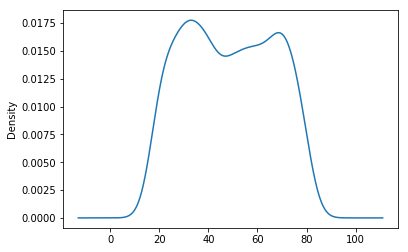

In [17]:
persons_df['age'].plot.density()

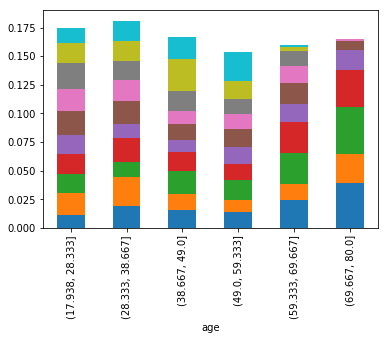

In [15]:
pd.crosstab(age_bins,excercise_bins,normalize=True).plot(kind='bar',legend=False,stacked=True)

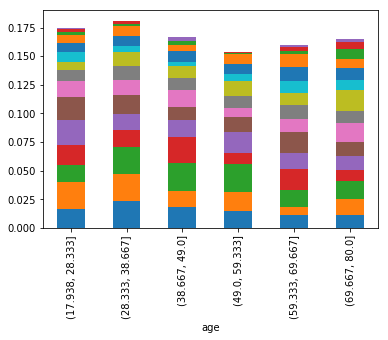

In [14]:
pd.crosstab(age_bins,weight_bins,normalize=True).plot(kind='bar',legend=False,stacked=True)

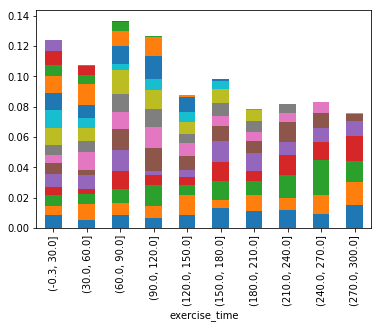

In [21]:
pd.crosstab(excercise_bins,weight_bins,normalize=True).plot(kind='bar',legend=False,stacked=True)

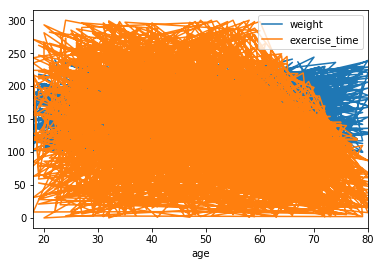

In [32]:
import matplotlib.pyplot as plt

ax = plt.gca()
persons_df.plot(kind='line',x='age',y='weight',ax=ax)
persons_df.plot(kind='line',x='age',y='exercise_time',ax=ax)
plt.show()

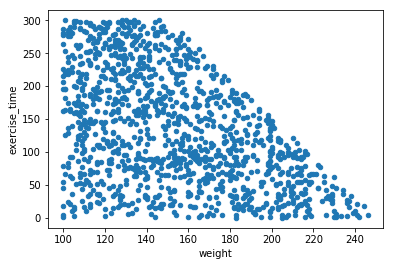

In [10]:
#Plotting a graph between weight and exercise time
persons_df.plot.scatter('weight','exercise_time')
#Observation : Upto weight 150, there is no relation but post 150 excercise time is negatively related to weight

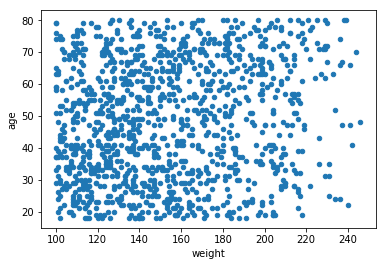

In [4]:
persons_df.plot.scatter('weight','age');
#Observation : There doesn't seem to be any relationship between age and weight

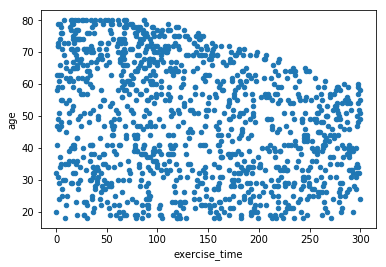

In [33]:
persons_df.plot.scatter('exercise_time','age');
#Observation : Excercise time is negatively co related to age after age 60

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
All three variables, weight, age and excercise times are continuous variable

2.  What are the relationships between the variables?

There doesn't seem to be any clear relationship, although based on the scatter plot there seems to be a mild relationship between age and excercise time after age 60 , similary there is a mild relationship between excercise time and weight after weight crosses 160 

3.  Which relationships are "real", and which spurious?

age and weight relationship seems to be spurious


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)